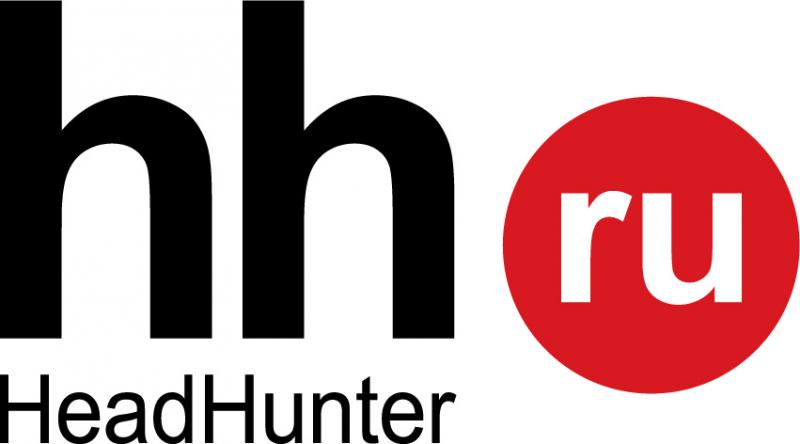

In [1]:
!pip install psycopg2

In [2]:
import psycopg2
import pandas as pd

In [4]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

# ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ

In [5]:
# №1 Сколько вакансий есть в базе данных?:

query = '''SELECT 
      COUNT(id)
FROM vacancies
'''
df = pd.read_sql_query(query, connection)
df

,count
0,49197


In [6]:
# №2 Сколько работодателей?:

query = '''SELECT DISTINCT 
      COUNT(name)
FROM employers
'''
df = pd.read_sql_query(query, connection)
df

,count
0,23501


In [7]:
# №3 Сколько регионов?:

query = '''SELECT DISTINCT 
      COUNT(name)
FROM areas
'''
df = pd.read_sql_query(query, connection)
df

,count
0,1362


In [8]:
# №4 Сколько сфер деятельности?:

query = '''SELECT DISTINCT 
      COUNT(name)
FROM industries
'''
df = pd.read_sql_query(query, connection)
df

,count
0,294


Таким образом, с помощью запросов, мы получили следующие данные:
 - 49197 количество вакансий в базе данных;
 - 23501 количество работодателей в базе данных;
 - 1362 количество охватываемых регионов в базе данных;
 - 294 количество сфер деятельности работодателей в базе данных.

# ДЕТАЛЬНЫЙ АНАЛИЗ ВАКАНСИЙ

In [9]:
# №1 Выведем  и количество предлагаемых в них вакансий:

query = f'''SELECT
    a.name region,
    COUNT(v.id) cnt
FROM vacancies v
JOIN areas a on a.id = v.area_id 
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
'''

df = pd.read_sql_query(query, connection)
df

,region,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


С помощью данного запроса, мы наблюдаем топ-5 городов, где публикуются наибольшее количество вакансий, соответственно, это Москва, Санкт-Петербург,  Минск, Новосибирск, Алматы.

In [10]:
# №2 Посмотрим у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой?:

query = f'''SELECT
                    COUNT(*)
            FROM vacancies v
            WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
            '''
df = pd.read_sql_query(query, connection)
df

,count
0,24073


In [11]:
# №3 Исследуем средние значения для нижней и верхней границы зарплатной вилки:

query = '''SELECT
               SUM(salary_from) / COUNT(salary_from) salary_from,
               SUM(salary_to) / COUNT(salary_to) salary_to
           FROM vacancies
           '''

df = pd.read_sql_query(query, connection)
df

,salary_from,salary_to
0,71064,110536


In [12]:
# №4 Напишем запрос, который выведет количество вакансий для каждого сочетания 
# типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях:

query = '''SELECT DISTINCT 
                   schedule,
                   employment,
                   COUNT(id) sum
           FROM vacancies
           GROUP BY schedule, employment
           ORDER BY sum DESC
           '''
df = pd.read_sql_query(query, connection)
df

,schedule,employment,sum
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


Из данного запроса мы можем отметить, что большинство вакансий опубликованы с условием полной занятости. Существенно меньшая часть рассматривает трудоустройство работников на условиях частичной занятости. Исходя из предпочтений работадателей по рабочему графику, мы видим, что большая часть вакансий имеют условие полного рабочего дня, на втором месте - удаленная работа.

In [13]:
# №5 Напишем запрос, выводящий значения поля Требуемый опыт работы (experience) 
# в порядке возрастания количества вакансий, в которых указан данный вариант опыта:

query = '''SELECT
                experience,
                COUNT(id) sum
            FROM vacancies
            GROUP BY experience
            ORDER BY sum DESC
            '''
df = pd.read_sql_query(query, connection)
df

,experience,sum
0,От 1 года до 3 лет,26152
1,От 3 до 6 лет,14511
2,Нет опыта,7197
3,Более 6 лет,1337


В данном случае, мы наблюдаем, что большинство вакакнсий имеют требование стажа работы от одного до трех лет опыта работы. Категория, где опыт работы не требуется стоит лишь на третьем месте обходя по количеству вакансий категорию с требованием стажа работы более шести лет.

# АНАЛИЗ РАБОТОДАТЕЛЕЙ

In [14]:
# №1 Напишем запрос, который позволит узнать, 
# какие работодатели находятся на первом месте по количеству вакансий:

query = '''SELECT
                e.name,
                COUNT(v.id) sum
            FROM vacancies v
            JOIN employers e ON e.id = v.employer_id
            GROUP BY e.name
            ORDER BY sum DESC
            LIMIT 5
            '''
df = pd.read_sql_query(query, connection)
df

,name,sum
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


Будет логичным понять, что пятерку компаний по количеству предлогаемых вакансий занимают компании федерального уровня. На общем фоне сильно выделяется компания Яндекс, которая предлогает 1933 вакансии, остальные не сильно различаются в анализируемом числе и находятся в диапазоне от 331 до 491.

In [15]:
# №2 Напишем запрос, который для каждого региона выведет количество работодателей в нём:

query = '''SELECT DISTINCT
                a.name,
                COUNT(DISTINCT e.id) employers
            FROM areas a
            LEFT JOIN employers e ON e.area = a.id
            LEFT JOIN vacancies v ON v.area_id = a.id
            WHERE v.id IS NULL
            GROUP BY a.id
            ORDER BY employers DESC
            LIMIT 5
            '''
df = pd.read_sql_query(query, connection)
df

,name,employers
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Беларусь,18


В данном запросе, мы вывели первую пятерку регионов по количеств работадателей. Можно заметить, что в Казахстане в два раза меньше работадателей, чем в России, а Московская область занимает практически 1/4 от всего объема работадателей в стране.

In [16]:
# №3 Для каждого работодателя посчитаем количество регионов, в которых он публикует свои вакансии:

query = '''SELECT
                e.name,
                COUNT(DISTINCT v.area_id) areas
            FROM employers e
            JOIN vacancies v ON v.employer_id = e.id
            GROUP BY e.name
            ORDER BY areas DESC
            LIMIT 5
            '''
df = pd.read_sql_query(query, connection)
df

,name,areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


В данном запросе у нас снова отличилась компания Яндекс, которая публикуюет свои вакансии в 181 регионе. Примечательно, что в данной пятерке не только юридические лица, но и индивидуальный предприниматель - Поляков Денис Иванович, который публикует свои вакансии в 88-ми регионах, что не является обычным для ИП.

In [17]:
# №4 Напишем запрос для подсчёта количества работодателей, у которых не указана сфера деятельности:

query = '''SELECT
                COUNT(e.id) sum
            FROM employers e
            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
            WHERE ei.industry_id IS NULL
            '''
df = pd.read_sql_query(query, connection)
df

,sum
0,8419


In [18]:
# №5 Напишем запрос, чтобы узнать название компании, находящейся на третьем месте 
# в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

query = '''SELECT
                e.name,
                COUNT(ei.employer_id) sum
            FROM employers_industries ei
            LEFT JOIN industries i ON ei.industry_id = i.id
            LEFT JOIN employers e ON e.id = ei.employer_id
            GROUP BY 1
            HAVING COUNT(ei.employer_id) = 4
            ORDER BY e.name
            OFFSET 2 LIMIT 1
            '''
df = pd.read_sql_query(query, connection)
df

,name,sum
0,2ГИС,4


In [19]:
# №6 С помощью запроса выясним, у какого количества работодателей 
# в качестве сферы деятельности указана «Разработка программного обеспечения»:

query = '''SELECT
                COUNT(e.id) sum
            FROM employers e 
            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
            LEFT JOIN industries i ON ei.industry_id = i.id
            WHERE i.name = 'Разработка программного обеспечения'
            '''
df = pd.read_sql_query(query, connection)
df


,sum
0,3553


In [20]:
# №7 Для компании «Яндекс» выведем список регионов-миллионников , 
# в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах:

import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = pd.read_html(url)[1]
city = list(cities['Город'])
city[13] = 'Воронеж'
city = tuple(city)

query = f'''WITH TOTAL AS 
               (SELECT a.name, 
                       COUNT(v.id) qty_vacancies
               FROM vacancies v 
               JOIN areas a ON v.area_id = a.id
               JOIN employers e ON v.employer_id = e.id
               WHERE e.name = 'Яндекс' AND a.name in {city}
               GROUP BY a.name)

               (SELECT a.name, 
                       COUNT(v.id) qty_vacancies
                FROM vacancies v 
                JOIN areas a ON v.area_id = a.id
                JOIN employers e ON v.employer_id = e.id
                WHERE e.name = 'Яндекс' AND a.name in {city}
                GROUP BY a.name)
                
                UNION ALL
                
                (SELECT 'Total', 
                        SUM(qty_vacancies)
                FROM total
                ORDER BY 2)
             '''
df = pd.read_sql_query(query, connection)
df


,name,qty_vacancies
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


Мы Провели анализ компании Яндекс, поскольку мы уже знаем, что данная компания опубликовала самое большое количество вакансий среди всех работадателей, но с помощью данного запроса, мы можем также провести и анализ других работадателей. Компания Яндекс наиболее заинтересована в сотрудниках в таких городах как Москва, Санкт-Петербург, Екатеринбург.

 #                              ПРЕДМЕТНЫЙ АНАЛИЗ

В данном блоке кода, мы проанализируем какое количество вакансий имеет непосредственное отношение к Data Science и какие требования указавыют работадатели при публикации вакансии:

In [21]:
# №1 Сколько вакансий имеет отношение к дата-саентистам?:
query = '''SELECT COUNT(*) 
           FROM vacancies 
           WHERE name ilike '%data%' OR name ilike '%данн%' 
           '''
df = pd.read_sql_query(query, connection)
df

,count
0,1771


С помощью запроса проведенного выше, мы увидели, что из всех предлогаемых вакансий только 3,5% имеют отношение к сфере работы с данными.

In [22]:
# №2 Сколько есть подходящих вакансий для начинающего дата-сайентиста?:
query = '''SELECT 
                 COUNT(*)
            FROM vacancies     
            WHERE (name ILIKE '%data scientist%' OR
                  name ILIKE '%data science%' OR
                  name ILIKE '%исследователь данных%' OR
                  name ILIKE '%ML%' AND name NOT ILIKE '%HTML%' OR
                  name ILIKE '%machine learning%' OR
                  name ILIKE '%машинн%обучен%')
                  AND
                  (name ILIKE '%junior%' OR
                  experience = 'Нет опыта' OR
                  employment = 'Стажировка')
                  '''
df = pd.read_sql_query(query, connection)
df

,count
0,51


Таким образом, мы можем сделать удручающий вывод о том, что из всего количества предлогаемых вакансий для Data-Science, только 3% имеет отношение к работникам начального уровня, остальные 97% вакансий требуют наличие оопределенного опыта работы.

In [23]:
# №3 Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?:
query = '''SELECT
                  COUNT(*)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' OR
                  name ILIKE '%data science%' OR
                  name LIKE '%ML%' AND name NOT ILIKE '%HTML%' OR
                  name ILIKE '%machine learning%' OR
                  name ILIKE '%машинн%обучен%') 
                  AND 
                  (key_skills ILIKE '%SQL%' OR 
                  key_skills ILIKE '%postgres%')
            '''
df = pd.read_sql_query(query, connection)
df

,count
0,201


В случае с SQL, Postgres уже более 11% или 201 из 1771 вакансий требуют владение данными языками программирования при отборе кандидатур на должность связанную с обработкой данных.

In [24]:
# №4 Насколько популярен Python в требованиях работодателей к DS?:
query = '''SELECT
                  COUNT(*)
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' OR
                  name ILIKE '%data science%' OR
                  name LIKE '%ML%' AND name NOT ILIKE '%HTML%' OR
                  name ILIKE '%machine learning%' OR
                  name ILIKE '%машинн%обучен%') 
                  AND 
                  (key_skills ILIKE '%python%')
            '''
df = pd.read_sql_query(query, connection)
df

,count
0,351


Данный язык используются в большинстве проектов, связанных с Machine Learning, Deep Learning, Computer Vision и др. сферах Data Science, но исходя из представленных данных, Python требуется только в 20% случаев или в 351 вакансии из 1771, что неестественно для сферы Data Science. 

In [25]:
# №5 Сколько ключевых навыков в среднем указывают в вакансиях для DS?:
query = '''SELECT
                avg(length(key_skills) - length(replace(key_skills, CHR(9), ''))+1) as avg_ks
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' OR 
                   name ILIKE '%data science%' OR
                   name ILIKE '%исследователь данных%' OR 
                   name LIKE '%ML%' AND name NOT ILIKE '%HTML%' OR 
                   name ILIKE '%machine learning%' OR 
                   name ILIKE '%машинн%обучен%')
            '''
df = pd.read_sql_query(query, connection)
df

,avg_ks
0,6.406032


Исходя из результатов данного запроса мы можем наблюдать, что в среднем для каждой вакансии связанной с Data Science, работадатели требуют более 6-ти ключевых навыков программирования, которыми должен владеть потенциальный кандидат.

In [71]:
# №6 Какую зарплату для DS в среднем указывают для каждого типа требуемого опыта?:
query = '''SELECT
                experience,
                COUNT(id) sum,
                round(AVG(COALESCE((salary_from+salary_to)/2, salary_from, salary_to)))
            FROM vacancies
            WHERE (name ILIKE '%data scientist%' OR 
                   name ILIKE '%data science%' OR
                   name ILIKE '%исследователь данных%' OR 
                   name LIKE '%ML%' AND name NOT ILIKE '%HTML%' OR 
                   name ILIKE '%machine learning%' OR 
                   name ILIKE '%машинн%обучен%')
                   AND
                   (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            GROUP BY experience
            ORDER BY sum
            '''
df = pd.read_sql_query(query, connection)
df

,experience,sum,round
0,Нет опыта,7,74643.0
1,От 3 до 6 лет,27,243115.0
2,От 1 года до 3 лет,28,139675.0


Результат этого запроса нам показывает, что есть прямая взаимосвязь между предполагаемой средней заработной платой работников и требуемым опытом работы. Мы видим, что средняя заработная плата увеличивается пропорционально опыту работы потенциального сотрудника.

In [27]:
# не забываем закрыть соединение после окончания работы
connection.close()

Таким образом, мы провели анализ данных связанных с поиском работы, с помощью SQL-запросов. Из каждого запроса мы можем делать соотвествующие выводы, которые повлияют на дальнейшее обучение моделей машинного обучения. Поэтому SQL является очень важным и востребованным инструментом для сферы анализа и обработки данных.